In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("rba-dataset.csv",nrows=50000)
df.head()

,index,Login Timestamp,User ID,Round-Trip Time [ms],IP Address,Country,Region,City,ASN,User Agent String,Browser Name and Version,OS Name and Version,Device Type,Login Successful,Is Attack IP,Is Account Takeover
0,0,2020-02-03 12:43:30.772,-4324475583306591935,NaN,10.0.65.171,NO,-,-,29695,Mozilla/5.0 (iPhone; CPU iPhone OS 13_4 like ...,Firefox 20.0.0.1618,iOS 13.4,mobile,False,False,False
1,1,2020-02-03 12:43:43.549,-4324475583306591935,NaN,194.87.207.6,AU,-,-,60117,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile 46.0.2490,Android 4.1,mobile,False,False,False
2,2,2020-02-03 12:43:55.873,-3284137479262433373,NaN,81.167.144.58,NO,Vestland,Urangsvag,29695,Mozilla/5.0 (iPad; CPU OS 7_1 like Mac OS X) ...,Android 2.3.3.2672,iOS 7.1,mobile,True,False,False
3,3,2020-02-03 12:43:56.180,-4324475583306591935,NaN,170.39.78.152,US,-,-,393398,Mozilla/5.0 (Linux; Android 4.1; Galaxy Nexus...,Chrome Mobile WebView 85.0.4183,Android 4.1,mobile,False,False,False
4,4,2020-02-03 12:43:59.396,-4618854071942621186,NaN,10.0.0.47,US,Virginia,Ashburn,398986,Mozilla/5.0 (Linux; U; Android 2.2) Build/NMA...,Chrome Mobile WebView 85.0.4183,Android 2.2,mobile,False,True,False


In [9]:
status_counts = df["Login Successful"].value_counts()

In [11]:
print("\nOverall login outcomes:")
print(status_counts)


Overall login outcomes:
Login Successful
False    25249
True     24751
Name: count, dtype: int64


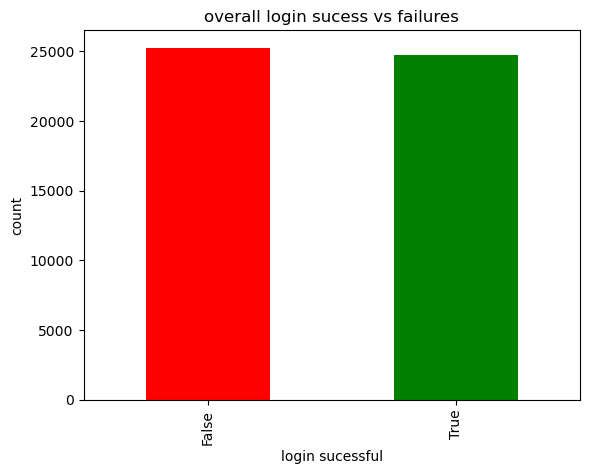

In [17]:
status_counts.plot(kind="bar", color=["red", "green"])
plt.title("overall login sucess vs failures")
plt.xlabel("login sucessful")
plt.ylabel("count")
plt.show()
                  

In [24]:
country_status = df.groupby("Country")["Login Successful"].value_counts().unstack().fillna(0)
print("top 10 countries by login attempts:")
print(country_status.head(10))

top 10 countries by login attempts:
Login Successful  False  True 
Country                       
AF                  2.0    0.0
AL                  3.0    0.0
AM                  3.0    0.0
AO                  5.0    1.0
AR                216.0    8.0
AT                  3.0    1.0
AU                430.0  191.0
BA                  4.0    0.0
BD                214.0   16.0
BE                 23.0    4.0


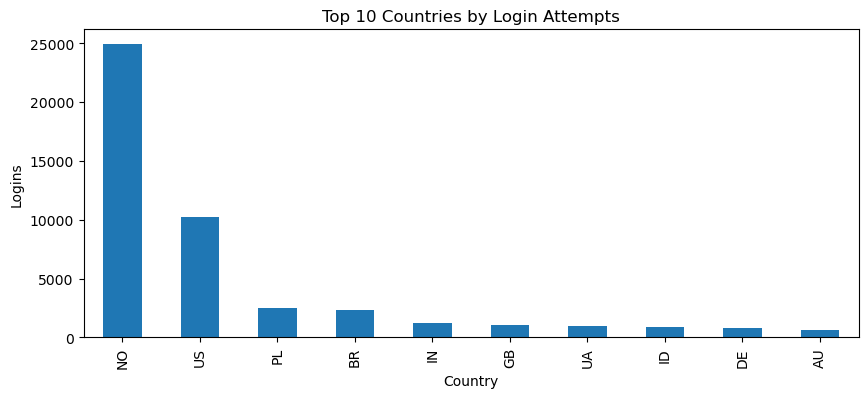

In [29]:
country_status.sum(axis=1).sort_values(ascending=False).head(10).plot(kind="bar",figsize=(10,4))
plt.title("Top 10 Countries by Login Attempts")
plt.ylabel("Logins")
plt.show()

In [32]:
device_status = df.groupby("Device Type")["Login Successful"].value_counts().unstack().fillna(0)
print(device_status)

Login Successful    False    True 
Device Type                       
bot                  29.0      0.0
desktop            4523.0   8312.0
mobile            19969.0  15430.0
tablet              698.0   1003.0
unknown              25.0      6.0


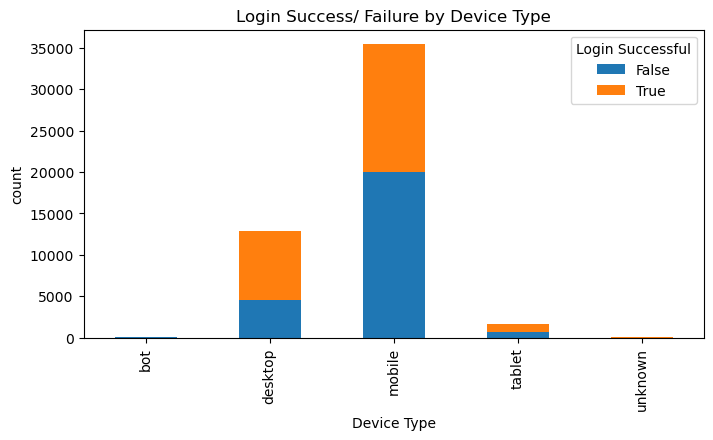

In [36]:
device_status.plot(kind="bar", stacked =True, figsize=(8,4))
plt.title("Login Success/ Failure by Device Type")
plt.ylabel("count")
plt.show()

In [37]:
user_failures = df[df["Login Successful"] == False]["User ID"].value_counts().head(10)
print(user_failures)

User ID
-4324475583306591935    17513
 6633007929620951525       26
 8578757305244579057       17
 4630765537127921569       17
-7714886869683390115       16
-2145592600608307367       15
 5955841859812228872       14
-8611797991768255245       12
 3715767431067374579       12
-6990208797929295960       11
Name: count, dtype: int64


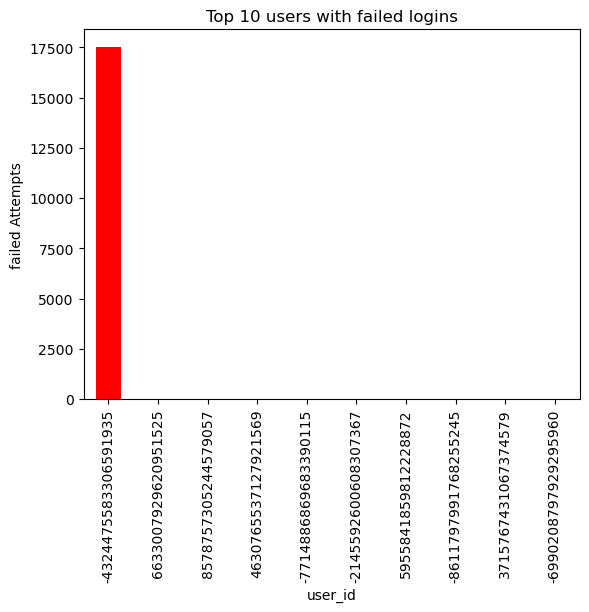

In [40]:
user_failures.plot(kind="bar", color="red")
plt.title("Top 10 users with failed logins")
plt.xlabel("user_id")
plt.ylabel("failed Attempts")
plt.show()

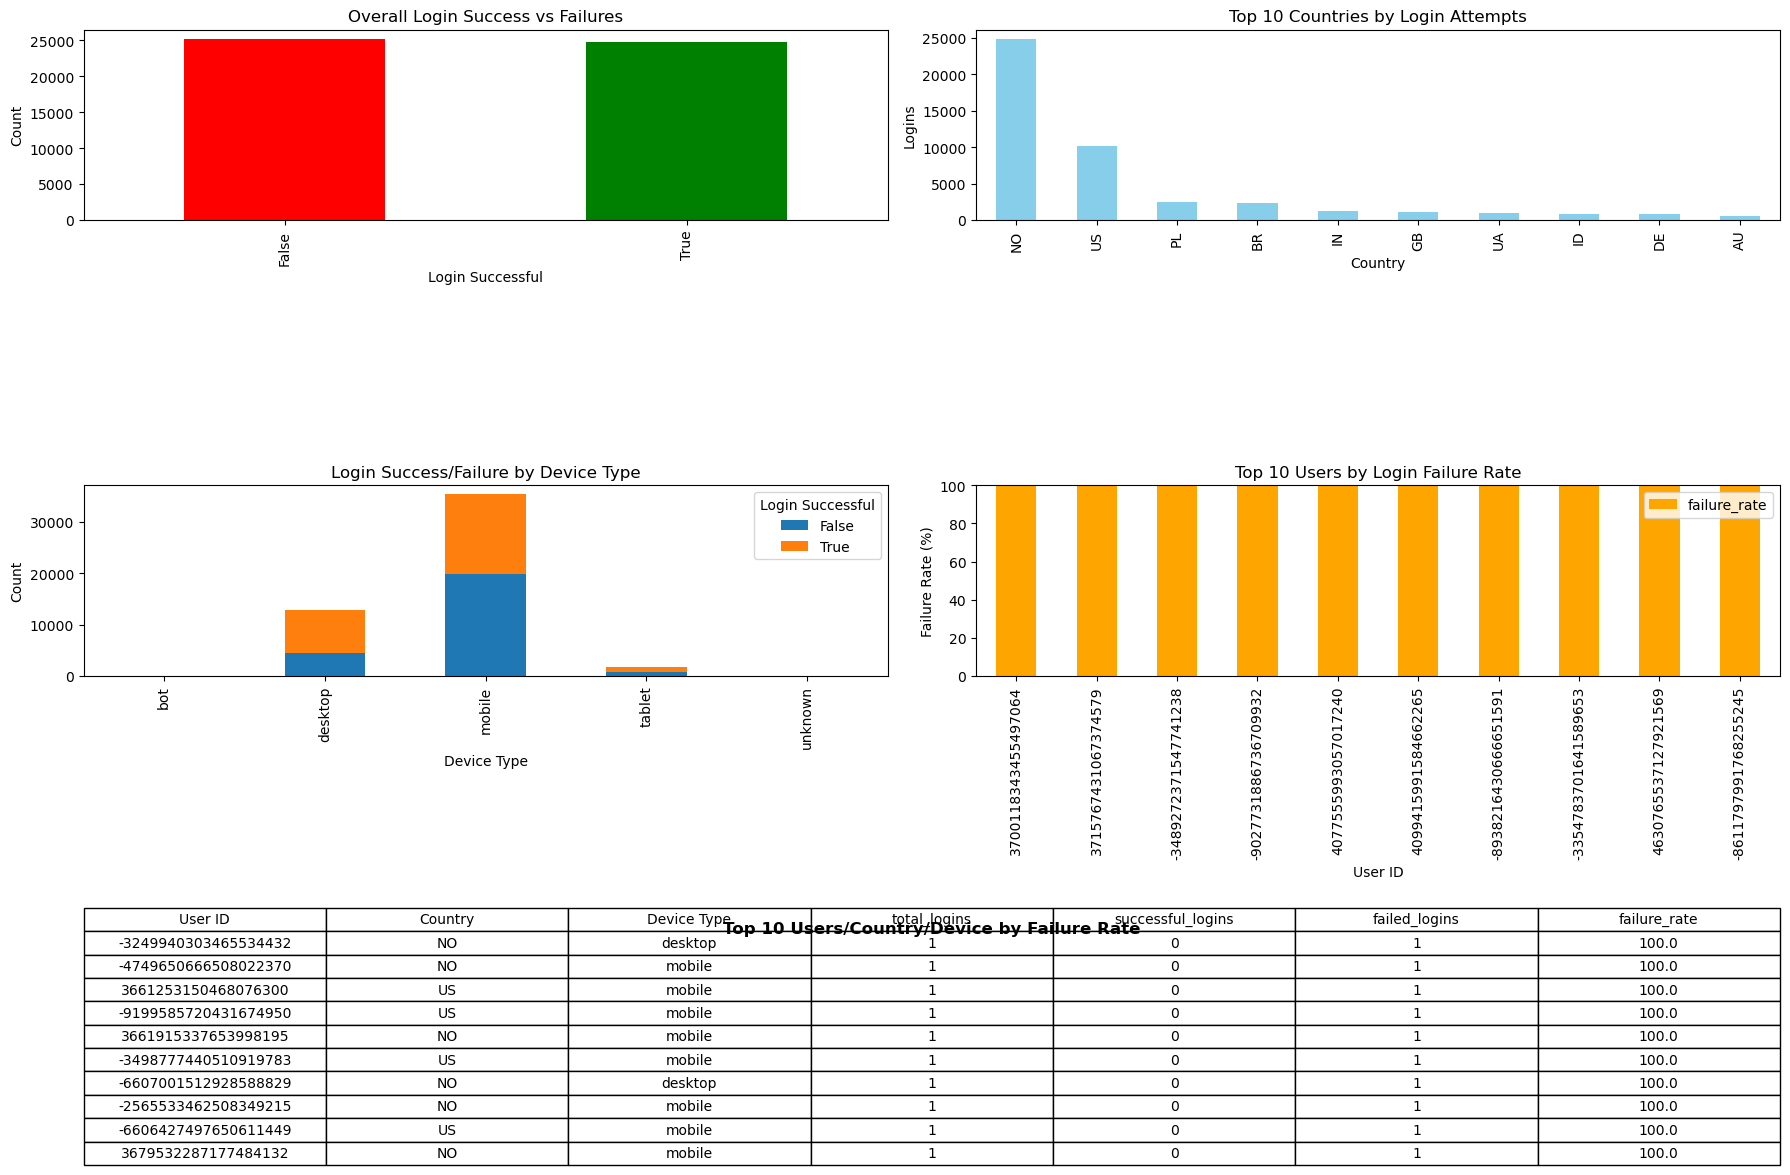

In [44]:
# --------------------------
# Step 0: Imports
# --------------------------
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# --------------------------
# Step 1: Load Dataset
# --------------------------
df = pd.read_csv("rba-dataset.csv", nrows=50000)
df["Login Successful"] = df["Login Successful"].astype(bool)

# --------------------------
# Step 2: Prepare Summary Table
# --------------------------
summary = df.groupby(["User ID", "Country", "Device Type"])["Login Successful"].agg(
    total_logins="count",
    successful_logins="sum"
).reset_index()
summary["failed_logins"] = summary["total_logins"] - summary["successful_logins"]
summary["failure_rate"] = (summary["failed_logins"] / summary["total_logins"]) * 100
summary_sorted = summary.sort_values(by="failure_rate", ascending=False)

# Top 10 for plotting
top_users_fail = summary_sorted[summary_sorted["total_logins"] >= 5].head(10)

# --------------------------
# Step 3: Prepare Charts Data
# --------------------------
# Overall success/failure
status_counts = df["Login Successful"].value_counts()

# Success/Failure by Country
country_status = df.groupby("Country")["Login Successful"].value_counts().unstack().fillna(0)
top_countries = country_status.sum(axis=1).sort_values(ascending=False).head(10)

# Success/Failure by Device Type
device_status = df.groupby("Device Type")["Login Successful"].value_counts().unstack().fillna(0)

# --------------------------
# Step 4: Create Dashboard Layout
# --------------------------
plt.figure(figsize=(18, 12))
gs = gridspec.GridSpec(3, 2, width_ratios=[1,1], height_ratios=[1,1,1])

# ---- Chart 1: Overall Login Success/Failure ----
ax0 = plt.subplot(gs[0, 0])
status_counts.plot(kind="bar", color=["red", "green"], ax=ax0)
ax0.set_title("Overall Login Success vs Failures")
ax0.set_xlabel("Login Successful")
ax0.set_ylabel("Count")

# ---- Chart 2: Top 10 Countries by Login Attempts ----
ax1 = plt.subplot(gs[0, 1])
top_countries.plot(kind="bar", ax=ax1, color="skyblue")
ax1.set_title("Top 10 Countries by Login Attempts")
ax1.set_xlabel("Country")
ax1.set_ylabel("Logins")

# ---- Chart 3: Login Success/Failure by Device Type ----
ax2 = plt.subplot(gs[1, 0])
device_status.plot(kind="bar", stacked=True, ax=ax2)
ax2.set_title("Login Success/Failure by Device Type")
ax2.set_xlabel("Device Type")
ax2.set_ylabel("Count")

# ---- Chart 4: Top 10 Users by Failure Rate ----
ax3 = plt.subplot(gs[1, 1])
top_users_fail.plot(x="User ID", y="failure_rate", kind="bar", color="orange", ax=ax3)
ax3.set_title("Top 10 Users by Login Failure Rate")
ax3.set_xlabel("User ID")
ax3.set_ylabel("Failure Rate (%)")
ax3.set_ylim(0, 100)

# ---- Table: Summary Top 10 Users ----
ax4 = plt.subplot(gs[2, :])
# Display only top 10 entries
table_data = summary_sorted.head(10)[["User ID","Country","Device Type","total_logins","successful_logins","failed_logins","failure_rate"]]
ax4.axis('off')
table = ax4.table(cellText=table_data.values,
                  colLabels=table_data.columns,
                  cellLoc='center',
                  loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
ax4.set_title("Top 10 Users/Country/Device by Failure Rate", fontweight="bold")

plt.tight_layout()
plt.show()
